In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv('G:/COVID 19/country_wise_latest.csv')
df2 = pd.read_csv('G:/COVID 19/covid_19_clean_complete.csv')
df3 = pd.read_csv('G:/COVID 19/day_wise.csv')
df4 = pd.read_csv('G:/COVID 19/full_grouped.csv')
df5 = pd.read_csv('G:/COVID 19/usa_county_wise.csv')
df6 = pd.read_csv('G:/COVID 19/worldometer_data.csv',dtype={'Population':str,'TotalRecovered':str,'ActiveCases':str,'TotalTests':str})

In [16]:
df6.dtypes
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    object 
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    object 
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    object 
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    object 
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(8), int64(1), object(7)
memory us

In [19]:
df1

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [14]:
#_____________ Top 10 Countries of Most Active Cases" _____________________________________ 
df_Most_Active_Cases = df1[['Country/Region','Active']].sort_values(by=['Active'],ascending=False).head(10)
df_Most_Active_Cases

,Country/Region,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


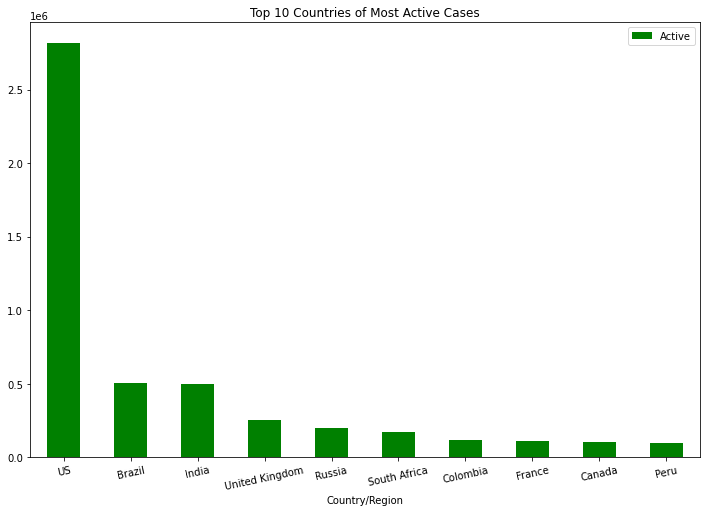

In [15]:
df_Most_Active_Cases.plot(rot=12,x="Country/Region", y="Active", color='green', kind="bar", 
                          figsize=(12,8),title ="Top 10 Countries of Most Active Cases")
plt.show()

In [55]:
#_____________ Top 10 Countries of Deaths Cases __________________________________________
df_Deaths_Cases = df1[['Country/Region','Deaths']].sort_values(by=['Deaths'],ascending=False).head(10)
df_Deaths_Cases

,Country/Region,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


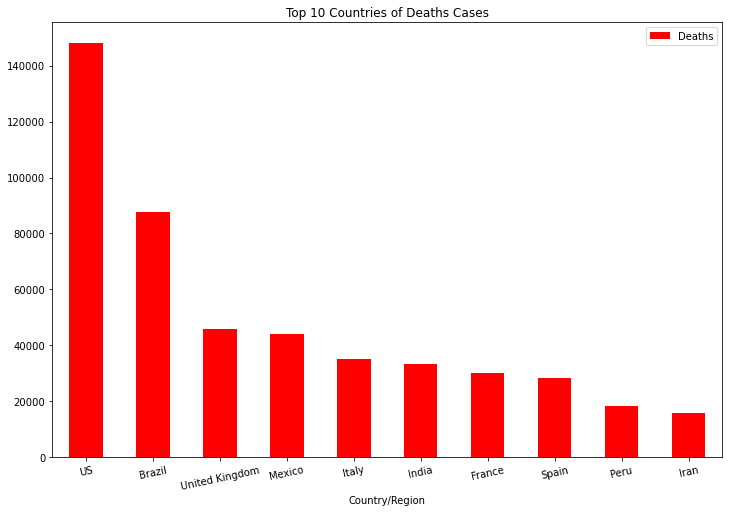

In [56]:
df_Deaths_Cases.plot(rot=12,x="Country/Region", y="Deaths", color='red', kind="bar", 
                     figsize=(12, 8),title ="Top 10 Countries of Deaths Cases")
plt.show()

In [11]:
#_____________ Top 10 Countries of Recovered Case _______________________________________
df_Recovered_Cases = df1[['Country/Region','Recovered']].sort_values(by=['Recovered'],ascending=False).head(10)
df_Recovered_Cases

,Country/Region,Recovered
23,Brazil,1846641
173,US,1325804
79,India,951166
138,Russia,602249
35,Chile,319954
111,Mexico,303810
154,South Africa,274925
132,Peru,272547
81,Iran,255144
128,Pakistan,241026


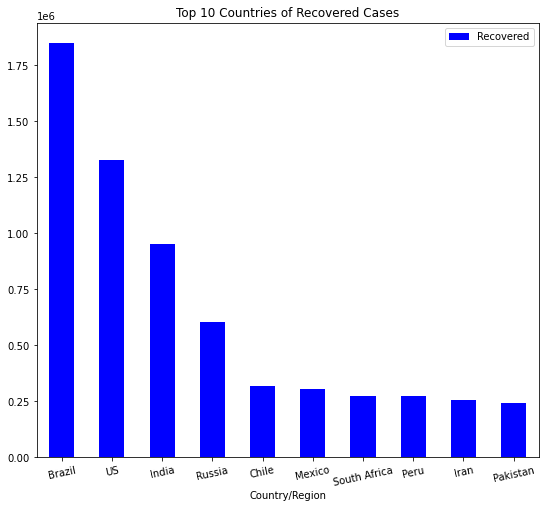

In [12]:
df_Recovered_Cases.plot(rot=12,x="Country/Region", y="Recovered", color='blue', kind="bar", 
                        figsize=(9, 8),title ="Top 10 Countries of Recovered Cases")
plt.show()

In [21]:
#_____________ Countries in WHO Region _______________________________________________________
df_area = df1.groupby(['WHO Region'])[['Country/Region']].count() 
df_area.set_axis(['Total Countries'], axis= 'columns',inplace=True) 
df_area = df_area.sort_values(['Total Countries'], ascending=False)
df_area

,Total Countries
WHO Region,
Europe,56
Africa,48
Americas,35
Eastern Mediterranean,22
Western Pacific,16
South-East Asia,10


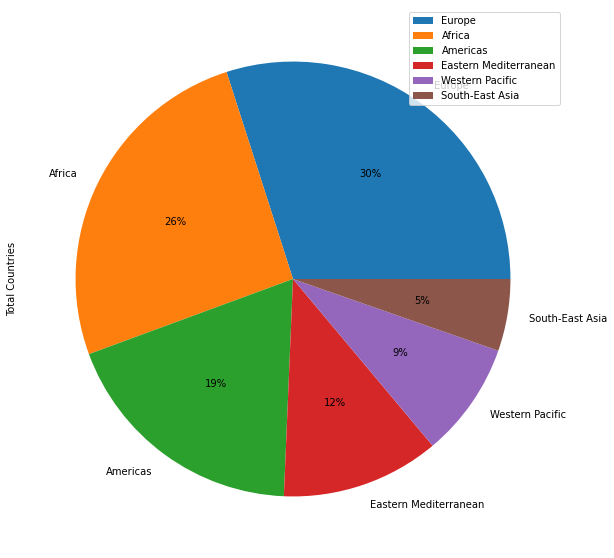

In [41]:
plot = df_area.plot.pie(y='Total Countries',autopct='%1.0f%%', figsize=(12, 10))

In [23]:
#_____________ Total Cases Active, Deaths, Recovered _________________________________________
df_WHO_Region = df1.groupby(['WHO Region'])[['Active','Deaths','Recovered']].sum()
df_WHO_Region.sort_values(['Active'], ascending=False, inplace=True)
df_WHO_Region

,Active,Deaths,Recovered
WHO Region,,,
Americas,4027938,342732,4468616
Europe,1094656,211144,1993723
South-East Asia,637015,41349,1156933
Africa,270339,12223,440645
Eastern Mediterranean,251005,38339,1201400
Western Pacific,77409,8249,206770


<AxesSubplot:title={'center':'Total Cases Active, Deaths, Recovered'}, xlabel='WHO Region'>

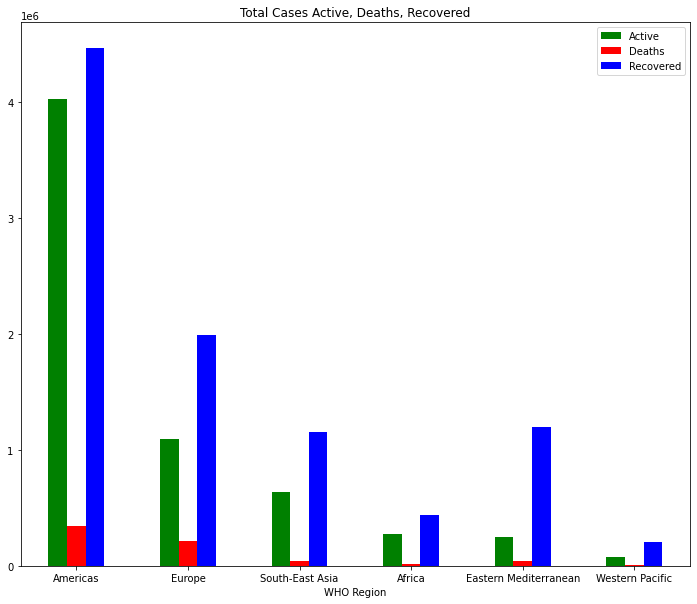

In [40]:
df_WHO_Region.plot.bar(rot=0,figsize = (12,10),title ="Total Cases Active, Deaths, Recovered",color={"Active": "green", "Deaths": "red","Recovered":"blue"})

In [25]:
df3

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [27]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Month'] = df3['Date'].dt.month
df3

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Month
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,1
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,1
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,1
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,1
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,7
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,7
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,7
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,7


In [29]:
df_Covid_Cases = df3.groupby(['Month'])[['New cases','New deaths','New recovered']].sum()
df_Covid_Cases.set_axis(['Active', 'Deaths', 'Recovered'],axis = 'columns',inplace=True)
df_Covid_Cases = df_Covid_Cases.sort_values('Active',ascending=False)
df_Covid_Cases

,Active,Deaths,Recovered
Month,,,
7,6030911,142826,4186628
6,4265801,137604,2695870
5,2921042,138902,1595973
4,2412383,190226,815542
3,786064,41542,135760
2,75379,2723,38095
1,9372,196,191


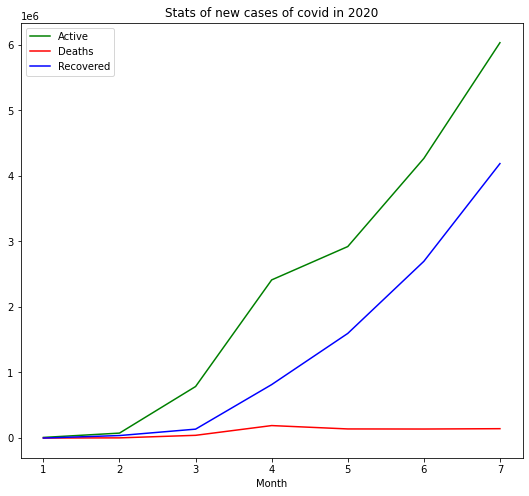

In [30]:
lines = df_Covid_Cases.plot.line(rot=0,figsize = (9,8),title ="Stats of new cases of covid in 2020",color={"Active": "green", "Deaths": "red","Recovered":"blue"})

In [32]:
#______________________ total cases in Europe and Asia __________________________
df_tongsoca = df6.groupby('Continent').sum()['TotalCases'].reset_index()
df_Europe = df_tongsoca[df_tongsoca.Continent == 'Europe']
df_Asia = df_tongsoca[df_tongsoca.Continent == 'Asia']
df_tongsoca

,Continent,TotalCases
0,Africa,1011867
1,Asia,4689794
2,Australia/Oceania,21735
3,Europe,2982576
4,North America,5919209
5,South America,4543273


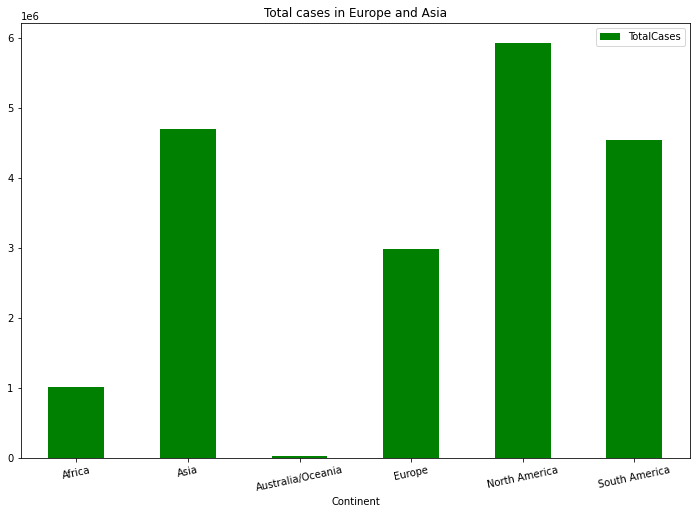

In [33]:
df_tongsoca.plot(rot=12,x="Continent", y="TotalCases", color='green', kind="bar", 
                          figsize=(12,8),title ="Total cases in Europe and Asia")
plt.show()

In [35]:
#_____________________ Where is the population highest and the percent of total cases/population
df6['Population'] = df6['Population'].fillna(0) 
df6 = df6.astype({'Population': 'int32'}) 
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        209 non-null    int32  
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    object 
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    object 
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    object 
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(8), int32(1), int64(1), object(6)

In [37]:
df_Population = df6.groupby(['Continent']).sum()['Population'] 
df6['Percent'] = (df6['TotalCases']/df6['Population'])*100 # what percent of population infected with covid 19
df_Percent = df6[['Continent','Population','TotalCases','Percent']].sort_values('Percent',ascending = False)
df_Percent = df_Percent.groupby(['Continent'])[['Percent']].sum()
df_Percent

,Percent
Continent,
Africa,6.445833
Asia,19.242805
Australia/Oceania,0.144575
Europe,20.945453
North America,8.854851
South America,10.844099


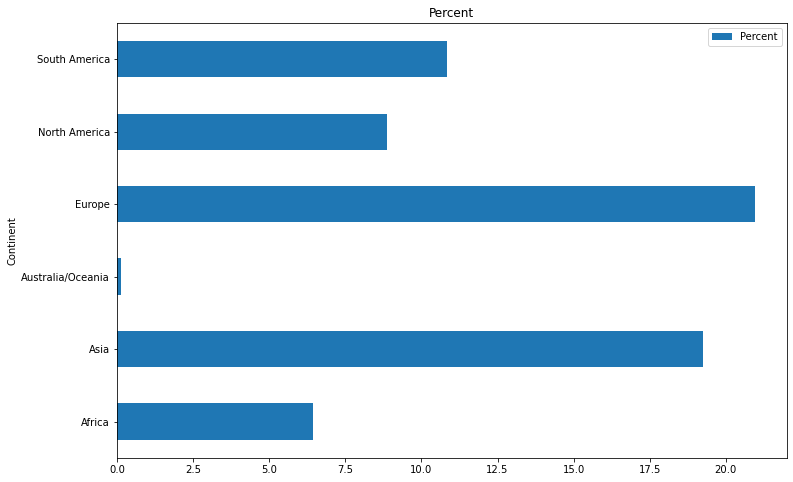

In [39]:
ax = df_Percent.plot.barh(rot=0,figsize = (12,8),title ="Percent")

In [47]:
#______________________ Percent of Deaths  _______________________________________________
df6['Death']=(df6['TotalDeaths']/df6['TotalCases'])*100 # Percent of Deaths 
df6['Continent'] = df6['Continent'].fillna(0)

In [48]:
df6

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Percent,Death
0,USA,North America,331198130,5032179,NaN,162804.0,NaN,2576668,NaN,2292707,18296.0,15194.0,492.0,63139605,190640.0,Americas,1.519386,3.235259
1,Brazil,South America,212710692,2917562,NaN,98644.0,NaN,2047660,NaN,771258,8318.0,13716.0,464.0,13206188,62085.0,Americas,1.371610,3.381042
2,India,Asia,1381344997,2025409,NaN,41638.0,NaN,1377384,NaN,606387,8944.0,1466.0,30.0,22149351,16035.0,South-EastAsia,0.146626,2.055782
3,Russia,Europe,145940924,871894,NaN,14606.0,NaN,676357,NaN,180931,2300.0,5974.0,100.0,29716907,203623.0,Europe,0.597429,1.675204
4,South Africa,Africa,59381566,538184,NaN,9604.0,NaN,387316,NaN,141264,539.0,9063.0,162.0,3149807,53044.0,Africa,0.906315,1.784520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4992,13,NaN,1.0,NaN,10,NaN,2,NaN,2604.0,200.0,61,12220.0,NaN,0.260417,7.692308
205,Caribbean Netherlands,North America,26247,13,NaN,NaN,NaN,7,NaN,6,NaN,495.0,NaN,424,16154.0,NaN,0.049529,NaN
206,Falkland Islands,South America,3489,13,NaN,NaN,NaN,13,NaN,0,NaN,3726.0,NaN,1816,520493.0,NaN,0.372600,NaN
207,Vatican City,Europe,801,12,NaN,NaN,NaN,12,NaN,0,NaN,14981.0,NaN,NaN,NaN,Europe,1.498127,NaN


In [51]:
df_Death = df6[['Continent','Death']]
df_Death = df_Death.groupby(['Continent'])[['Death']].sum()
df_Death

,Death
Continent,
Africa,136.246841
Asia,96.967301
Australia/Oceania,8.228413
Europe,225.083778
North America,108.522903
South America,37.032071


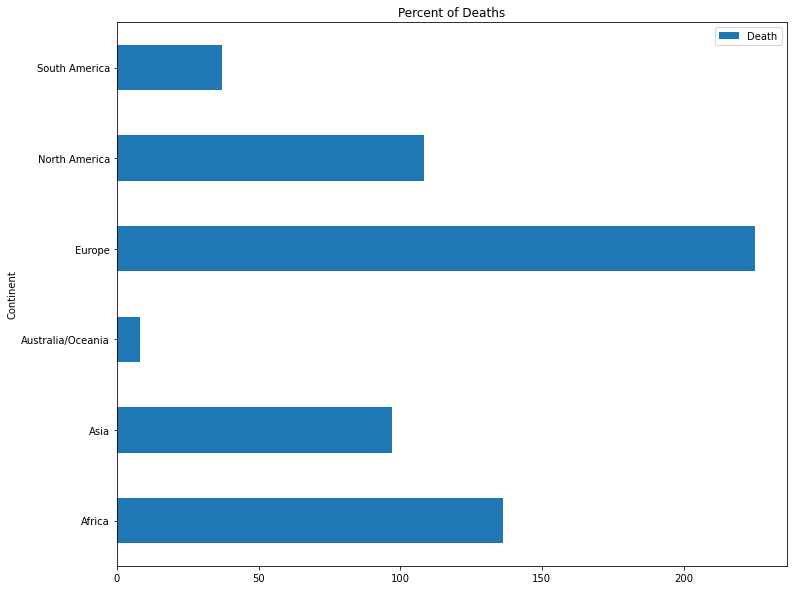

In [53]:
ax = df_Death.plot.barh(rot=0,figsize = (12,10),title ="Percent of Deaths")